<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>Treball de Final de Màster </b></p>
<p style="margin: 0; text-align:right;"><b>ANÀLISI DEL DIA MUNDIAL DE LES MALALTIES MINORITÀRIES (Font de dades: TWITTER)</b>.</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 3: Disseny i Implementació del TFM.

# PREPROCESSAT i 'FEATURE ENGINEERING' DEL DATASET DE DADES : 
<p style="color:#0000FF">
En aquest Jupyter Notebook, es recullen les proves per recompte tipus 'Bag of Words' a partir del dataset generat en la fase de generació del dataset.<br> Es fan estudis amb la llibreria SKLEARN i NLTK, així com proves de visualitzacions amb gràfic de tipus núvol de paraules.
També es fan proves de vectorització amb TF-IDF.
</p>

<div style="text-align:right">
    <span style="font-family:calibri;font-size:8;color:white; background-color:Crimson; text-align:right; margin-left: 0.5cm;padding:0.3cm"> Autor: </span>
    <span style="font-family:calibri;font-size:8;color:white; background-color:RoyalBlue; text-align:center;  margin-right: 0.5cm; padding:0.3cm"><b> Joaquim de Dalmases Juanet </b></span>
</div>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, WordPunctTokenizer, RegexpTokenizer, TweetTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.lancaster import LancasterStemmer
from datetime import datetime
from datetime import timedelta  
import string
import re, collections
import time
from textblob import TextBlob
import codecs
import json
import emoji
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
# Càrrega de dades del fitxer de disc amb el dataset de dades preprocessat.
time_start = time.time()
dataset=pd.read_excel("DMMM_Dataset_final.xlsx")
temps=(time.time()-time_start)/60
print("#Total de tuits:",dataset.shape[0],"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
      int((temps-int(temps))*60),"segons.")

#Total de tuits: 98433 
 Durada:  0 minut/s  23 segons.


In [3]:
# Mostra del dataset
dataset.head(2)

,_id,created_at,text_x,text_net,text_Norm,diaSem,dia,mes,yy,hora,...,user_idstr,user_friends_c,user_followers_c,user_listed_c,retweet_count,lang,polarity,subjectivity,emojis,text_y
0,5e78e80f4e54db2148d19749,Thu Feb 13 09:58:19 +0000 2020,RT @FEDER_ONG: Las 29 obras ganadoras del conc...,winning works photographic contest form travel...,win work photograph contest form travel exhibi...,Thursday,13,2,2020,9,...,4054806561,8,3,0,0,es,0.500000,0.750000,[],RT @FEDER_ONG: The 29 winning works of the pho...
1,5e78e80f4e54db2148d1974a,Thu Feb 13 10:01:01 +0000 2020,"📌 Esta tarde, a partir de las 21:00h, nuevo #C...",afternoon starting new centered,afternoon start new cent,Thursday,13,2,2020,10,...,64270216,853,2104,31,0,es,0.068182,0.277273,['📌'],"📌 This afternoon, starting at 21 :00h, new #Cr..."


In [4]:
# Definició del dataset de treball.
df=dataset[['_id','created_at','text_net','text_Norm','diaSem','user_idstr']]

In [5]:
dataset=df

In [6]:
# Funció per generar un llista amb totes les paraules dels textos de tots els tuits
# usant un dataframe i un nom de columna.
def columnaExcelText_a_llista(df, camp):
    llista=[]
    for l in df[camp]:
        llista.append(l.lower().split())
    return llista
# Funció per generar una llista amb totes les paraules
def campLlistaText_a_llistaGlobal(df, nomCamp):
    time_start = time.time()
    text_net = columnaExcelText_a_llista(df,nomCamp)
    words=sum(text_net,[])
    temps=(time.time()-time_start)/60
    print("#Paraules:",len(words),"\n Durada: ",int(temps) if temps>0 else 0,"minut/s ", \
          int((temps-int(temps))*60),"segons.")
    return words

In [7]:
# Generació de la llista de totes les paraules preprocessades del dataset.
corpora_text_net = campLlistaText_a_llistaGlobal(dataset,"text_net")

#Paraules: 873224 
 Durada:  11 minut/s  24 segons.


In [8]:
# Recompte de paraules -> implementació BoW: Bag of Words
# genrem un diccionari: keys=paraules / values=recompte 
# total d'un paraula en tots els tuits.
paraules_bow_net=collections.Counter(corpora_text_net)

In [30]:
# Pas dict->DataFrame
text_net_keys=paraules_bow_net.keys()
text_net_values=paraules_bow_net.values()
print(len(text_net_keys))

21582


In [10]:
# Generació d'un dataframe amb el BoW.
conta_text_net = pd.DataFrame({'paraula':list(text_net_keys),'contador':list(text_net_values)})

In [11]:
# Visualització del recompte per ordre de més a menys freqüència (ordre descendent)
conta_text_net = conta_text_net.sort_values(by="contador",ascending=False)

In [12]:
# DataFrame amb el Bag of Words (BoW)
conta_text_net.head(25)

,paraula,contador
54,rare,38093
49,day,26268
44,today,19299
52,disease,16293
282,diseases,15709
71,people,13588
48,world,9464
276,us,8557
264,research,7850
91,february,6933


In [13]:
# Revisió / Eliminació de paraules generades per els hashtags o poc significatives.
wordc=conta_text_net.drop([54,49,44,52,282,91])

In [14]:
# Selecció de les primeres 500 paraules.
# Es recomana max. 500 paraules en un WordCloud.
Comptador=wordc.iloc[0:500,:]

In [15]:
Comptador

,paraula,contador
71,people,13588
48,world,9464
276,us,8557
264,research,7850
191,awareness,6595
...,...,...
981,it,261
17669,tallest,261
934,behind,260
15703,avg,259


## WordClouds

In [16]:
# Preprocessat per la visualització
ftext = " ".join(word for word in wordc.paraula)

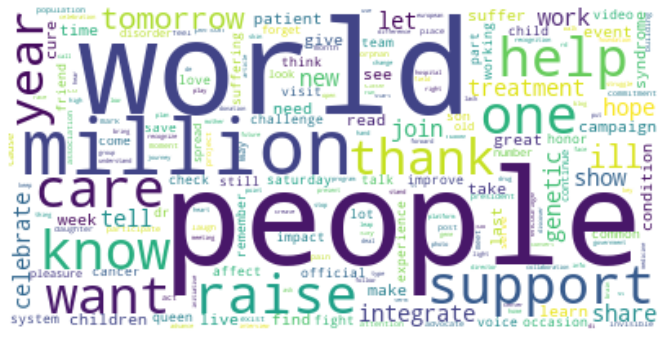

In [17]:
# Implementació del wordcloud llibreria wordcloud.
wordcloud = WordCloud(background_color='white').generate(ftext)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig("wordCount_WordCloud.jpg",format='jpg',bbox_inches='tight')

## Proves amb la llibreria NLTK, per generar el Bag of Words.

In [18]:
from nltk.probability import FreqDist

In [19]:
# Opció de recompte en NLTK -> genera una llista de tuits donat un corpus.
frequency_dist = nltk.FreqDist(corpora_text_net)

In [20]:
len(frequency_dist)

21582

In [21]:
list(frequency_dist.keys())[0:6]

['winning', 'works', 'photographic', 'contest', 'form', 'travelling']

In [22]:
frequency_dist1 = nltk.FreqDist(dataset.text_net)

In [23]:
list(frequency_dist1.keys())[0:6]

['winning works photographic contest form travelling exhibition tour geography espa',
 'afternoon starting new centered',
 'thanks emilio butragueño david de maria soledad giménez commitment thang thang',
 'going look beautiful',
 'honor collaborating teaching subject physiopathology',
 'want reiterate support work']

In [24]:
len(list(frequency_dist1.keys()))

30664

In [25]:
len(dataset.text_net)

98433

In [26]:
full_text = dataset.text_net.str.cat(sep=' ')
for k in ['rare','day','today','disease','us','brothers','sisters']:
    full_text = full_text.replace(k,"")

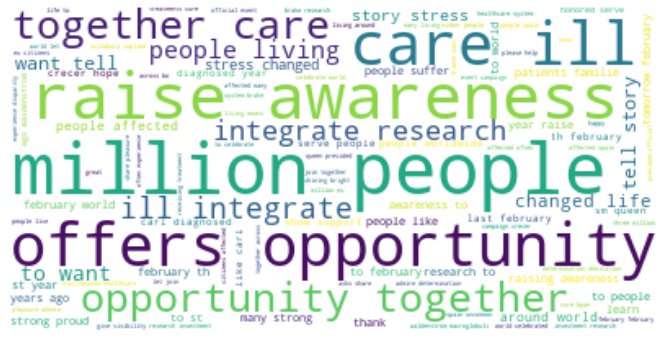

In [27]:
wordcloud = WordCloud(background_color='white').generate(full_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig("wordCount_WordCloud_full_text.jpg",format='jpg',bbox_inches='tight')

## TF-IDF, revisió i vocabulari per modificar errors en la fase anterior de depurat i neteja del text

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(list(frequency_dist1.keys()))
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'winning': 21117, 'works': 21206, 'photographic': 14715, 'contest': 4174, 'form': 7534, 'travelling': 19806, 'exhibition': 6827, 'tour': 19680, 'geography': 8003, 'espa': 6612, 'afternoon': 480, 'starting': 18393, 'new': 13309, 'centered': 3093, 'thanks': 19363, 'emilio': 6240, 'butragueño': 2633, 'david': 4817, 'de': 4841, 'maria': 11910, 'soledad': 18024, 'giménez': 8071, 'commitment': 3813, 'thang': 19356, 'going': 8174, 'look': 11480, 'beautiful': 1877, 'honor': 9035, 'collaborating': 3695, 'teaching': 19175, 'subject': 18660, 'physiopathology': 14738, 'want': 20871, 'reiterate': 16308, 'support': 18821, 'work': 21196, 'associative': 1415, 'tissue': 19558, 'grows': 8396, 'exponentially': 6904, 'last': 10998, 'years': 21340, 'thank': 19357, 'laded': 10929, 'today': 19583, 'present': 15261, 'press': 15283, 'conference': 4004, 'world': 21210, 'day': 4821, 'abraham': 73, 'president': 15275, 'disease': 5487, 'considered': 4112, 'rare': 15948, 'affects': 447, 'limited': 11318, 'number':

In [ ]:
# Recerca de visualització directe per freqüències
wordcloud = WordCloud(background_color='white').generate_from_frequencies(??)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [106]:
# Revisió errors de caràcters en blanc per el text
frequency_dist1

FreqDist({'  pontifex rarediseaseday offers us opportunity together care brothers sisters ill integrate research': 2888, '  melanietobal today day enfermedadesraras want tell story day stress changed life': 1838, '  rarediseaseday today rarediseaseday rarest day year raise awareness today people living': 759, '  janssenus rarediseaseday honored serve people like carl diagnosed years ago waldenström macroglobuli': 543, '  julia_otero friend isabelgemio asks share pleasure admire determination dedication enfermedadesr': 511, '  rarediseaseday million people living rare disease around world rarediseaseday let join together across bo': 420, '  monasterior fractionated healthcare system autonomías brake research investment research en': 396, '  eu_commission it s rarediseaseday million eu citizens affected rare diseases many living rare disease means': 368, '  salvadorilla million people affected enfermedadesraras spain uncommon diseases challenge': 364, '  giuseppeconteit people affected r